In [60]:
# !pip install numpy
# !pip install opencv-python
# !pip install matplotlib
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt

In [21]:
DIRECTORY = r"/home/kiarashfz/Documents/cat_dog/archive/dataset/training_set"
CATEGORIES = ["cats", "dogs"]

folder:
/home/kiarashfz/Documents/cat_dog/archive/dataset/training_set/cats

folder:
/home/kiarashfz/Documents/cat_dog/archive/dataset/training_set/dogs



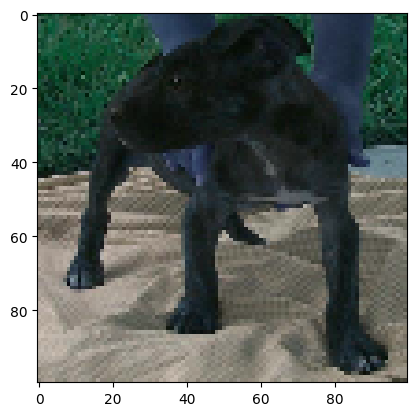

In [46]:
IMG_SIZE = 100
dataset = []
for category in CATEGORIES:
# for category in CATEGORIES[::-1]:
    folder = os.path.join(DIRECTORY, category)
    print(f"folder:\n{folder}\n")
    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)
        img_arr = cv2.imread(img_path)
        resized_img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
        plt.imshow(resized_img_arr)
        
        label = 0 if category == "cats" else 1
        dataset.append([resized_img_arr, label])
#         print(f"img_name:\n{img_name}\n")
#         print(f"img_path:\n{img_path}\n")
#         print(f"img_arr:\n{img_arr}\n")
#         print(f"resized_img_arr:\n{resized_img_arr}\n")
#         break
# print(dataset)

In [47]:
len(img_arr)

499

In [49]:
len(resized_img_arr)

100

In [50]:
dataset[0]

[array([[[ 65,  69,  72],
         [ 48,  68,  73],
         [133, 168, 173],
         ...,
         [244, 244, 237],
         [255, 254, 253],
         [255, 253, 255]],
 
        [[ 36,  42,  50],
         [ 19,  43,  49],
         [148, 184, 191],
         ...,
         [254, 252, 251],
         [252, 254, 254],
         [248, 254, 255]],
 
        [[ 66,  74,  83],
         [ 18,  40,  46],
         [ 98, 132, 137],
         ...,
         [246, 254, 252],
         [254, 255, 250],
         [255, 255, 248]],
 
        ...,
 
        [[ 27,  79, 167],
         [ 34,  87, 174],
         [ 27,  80, 170],
         ...,
         [ 41, 106, 200],
         [ 38, 101, 193],
         [ 38,  99, 189]],
 
        [[ 35,  80, 161],
         [ 32,  79, 160],
         [ 38,  85, 167],
         ...,
         [ 34,  99, 193],
         [ 40, 103, 195],
         [ 39, 101, 191]],
 
        [[ 42,  83, 156],
         [ 45,  85, 160],
         [ 36,  79, 154],
         ...,
         [ 41, 107, 200],
  

In [51]:
len(dataset)

8000

In [53]:
random.shuffle(dataset)

In [56]:
features = []
labels = []

for f, l in dataset:
    features.append(f)
    labels.append(l)

In [58]:
features = np.array(features)
labels = np.array(labels)

In [61]:
pickle.dump(features, open("features.pkl", "wb"))
pickle.dump(labels, open("labels.pkl", "wb"))

In [63]:
features = features / 255

In [64]:
features

array([[[[0.32156863, 0.29411765, 0.32941176],
         [0.32156863, 0.30980392, 0.34509804],
         [0.28627451, 0.29411765, 0.3254902 ],
         ...,
         [0.76078431, 0.72941176, 0.72941176],
         [0.68627451, 0.65882353, 0.64705882],
         [0.64313725, 0.6       , 0.58431373]],

        [[0.3254902 , 0.31372549, 0.34901961],
         [0.3372549 , 0.34509804, 0.37647059],
         [0.33333333, 0.34509804, 0.37647059],
         ...,
         [0.78823529, 0.75686275, 0.75686275],
         [0.78039216, 0.75294118, 0.74117647],
         [0.76470588, 0.7254902 , 0.71764706]],

        [[0.30588235, 0.31764706, 0.34901961],
         [0.29803922, 0.32941176, 0.35686275],
         [0.29411765, 0.33333333, 0.36078431],
         ...,
         [0.8       , 0.76862745, 0.76862745],
         [0.77647059, 0.74901961, 0.7372549 ],
         [0.76862745, 0.72941176, 0.72941176]],

        ...,

        [[0.21176471, 0.18431373, 0.21176471],
         [0.20392157, 0.20392157, 0.22745098]

In [65]:
labels

array([0., 1., 0., ..., 1., 0., 0.])

In [66]:
features.shape

(8000, 100, 100, 3)

In [67]:
len(dataset)

8000

In [116]:
# !pip install tensorflow
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Reshape

In [120]:
model = Sequential()

model.add(Reshape((100,100,3),input_shape=features.shape[1:]))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
# count of features doesn't matter(100, 100, 3)
model.add(Dense(128, input_shape= features.shape[1:], activation="relu"))
model.add(Dense(2, activation="softmax"))

In [121]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [122]:
model.fit(features, labels, epochs=3, validation_split=0.1)

Epoch 1/3
225/225 [==============================] - 80s 335ms/step - loss: 0.9532 - accuracy: 0.4999 - val_loss: 0.6931 - val_accuracy: 0.5075
Epoch 2/3
225/225 [==============================] - 75s 324ms/step - loss: 0.6930 - accuracy: 0.4986 - val_loss: 0.6873 - val_accuracy: 0.5475
Epoch 3/3
225/225 [==============================] - 71s 313ms/step - loss: 0.6838 - accuracy: 0.5601 - val_loss: 0.6598 - val_accuracy: 0.6212


In [123]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_2 (Reshape)         (None, 100, 100, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 49, 49, 64)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 153664)            0         
                                                                 
 dense_10 (Dense)            (None, 128)               19669120  
                                                                 
 dense_11 (Dense)            (None, 2)                 258       
                                                     

In [155]:
def convert_image_path_to_arr(path):
    img = cv2.imread(path)
    new_arr = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    new_arr = np.array(new_arr)
    new_arr = new_arr.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
    return new_arr

In [156]:
dog_path = "/home/kiarashfz/Desktop/dog.jpeg"
dog_arr = convert_image_path_to_arr(dog_path)

In [157]:
prediction = model.predict([dog_arr])
print(CATEGORIES[prediction.argmax()])

1/1 [==============================] - 0s 133ms/step
dogs


In [158]:
cat_path = "/home/kiarashfz/Documents/cat_dog/archive/dataset/test_set/cats/cat.4020.jpg"
cat_arr = convert_image_path_to_arr(cat_path)


prediction = model.predict([cat_arr])
print(CATEGORIES[prediction.argmax()])

1/1 [==============================] - 0s 67ms/step
cats
